In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 

import evaluate
from prepare import train_validate_test_split

from pydataset import data

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
train, validate, test = train_validate_test_split(df, target = None)

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [5]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# x is total_bill
# y is tips
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to training data
lm.fit(train[['total_bill']], train.tip)

# make prediction
train['yhat'] = lm.predict(train[['total_bill']])



In [6]:
train["residuals"] = train.yhat - train.tip
train["baseline"] = train.tip.mean()
train["baseline_residual"] = train.baseline - train.tip

3. Plot residuals

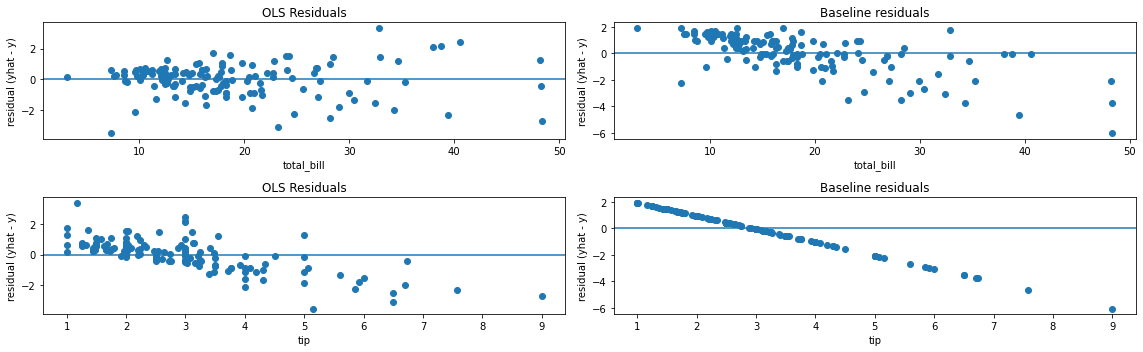

In [7]:
plt.subplots(2,2, figsize=(16,5))
plt.subplot(221)
plt.scatter(x=train.total_bill, y = train.residuals)
plt.axhline(0)
plt.xlabel('total_bill')
plt.ylabel('residual (yhat - y)')
plt.title("OLS Residuals")
plt.subplot(222)
plt.scatter(x=train.total_bill, y = train.baseline_residual)
plt.axhline(0)
plt.xlabel('total_bill')
plt.ylabel('residual (yhat - y)')
plt.title("Baseline residuals")

plt.subplot(223)
plt.scatter(x=train.tip, y = train.residuals)
plt.axhline(0)
plt.xlabel('tip')
plt.ylabel('residual (yhat - y)')
plt.title("OLS Residuals")
plt.subplot(224)
plt.scatter(x=train.tip, y = train.baseline_residual)
plt.axhline(0)
plt.xlabel('tip')
plt.ylabel('residual (yhat - y)')
plt.title("Baseline residuals")

plt.tight_layout()

3. SSE, Explained sum of squares, total sum of squares, mean squared error, RMSE for OLS model

In [8]:
SSE = (train.residuals**2).sum()

ESS = ((train.yhat - train.baseline)**2).sum()

# TSS = ((train.tip-train.baseline)**2).sum() .... OR:
TSS = SSE + ESS

MSE = SSE/len(train)

RMSE_model = MSE ** 0.5

model = {'SSE':SSE,'ESS':ESS,'TSS':TSS,'MSE':MSE, 'RMSE':RMSE_model}

4. SSE, Explained sum of squares, total sum of squares, mean squared error, RMSE for Baseline

In [9]:
SSE = (train.baseline_residual**2).sum()

ESS = ((train.baseline - train.baseline)**2).sum()

# TSS = ((train.tip-train.baseline)**2).sum() .... OR:
TSS = SSE + ESS

MSE = SSE/len(train)

RMSE_base = MSE ** 0.5

base = {'SSE':SSE,'ESS':ESS,'TSS':TSS,'MSE':MSE, 'RMSE':RMSE_base}

In [10]:
results = pd.DataFrame(data=[model,base], index = ['model','base']).T

In [11]:
results

,model,base
SSE,153.536640,286.431664
ESS,132.895024,0.000000
TSS,286.431664,286.431664
MSE,1.128946,2.106115
RMSE,1.062519,1.451246


6. Compare performance

In [12]:
print("Model is better than baseline (SSE is less): ", results.model.SSE<results.base.SSE)

Model is better than baseline (SSE is less):  True


7. Expected variance / R2

In [13]:
R2_model = results.model.ESS/results.model.TSS

In [14]:
R2_model

0.4639676437939073

8. Is model better than the baseline?

In [15]:
R2_baseline = explained_variance_score(train.tip, train.baseline)

In [16]:
R2_baseline

0.0

In [17]:
print("OLS model is better than baseline (R2 is greater): ", R2_model>R2_baseline)

OLS model is better than baseline (R2 is greater):  True


### Model is superior to baseline 

#### Using functions in evaluate.py to determine if model better than baseline (based on RMSE)

In [18]:
evaluate.better_than_baseline(train.tip, train.yhat)

True

### 10. mpg dataset, fit model predicting highway mileage based on engine displacement

In [19]:
mpg = data('mpg')

In [20]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [21]:
train, validate, test = train_validate_test_split(mpg, target = None)

In [22]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# x is displacement
# y is hwy (mpg)
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to training data
lm.fit(train[['displ']], train.hwy)

# make prediction
train['yhat'] = lm.predict(train[['displ']])



In [23]:
train["residuals"] = train.yhat - train.hwy
train["baseline"] = train.hwy.mean()
train["baseline_residual"] = train.baseline - train.hwy

Plot residuals

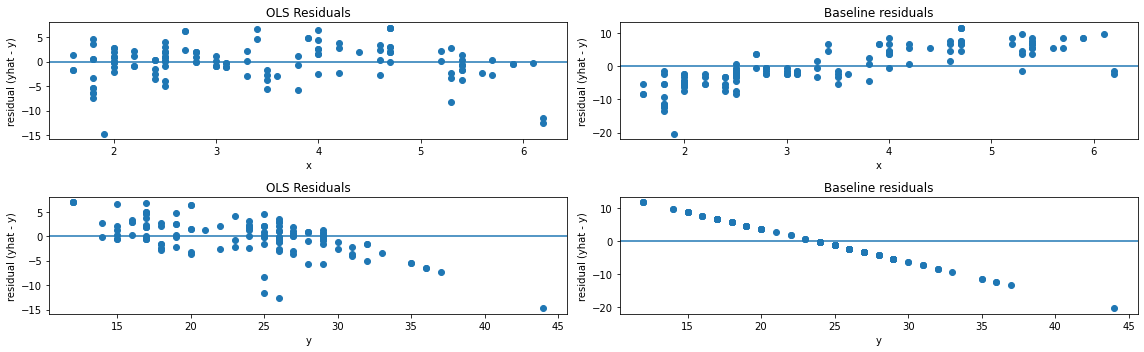

In [24]:
evaluate.plot_residuals(train.displ, train.hwy, train.yhat)

In [25]:
evaluate.regression_errors(train.hwy, train.yhat)

{'SSE': 1722.7590136557003,
 'ESS': 3027.5179094212276,
 'TSS': 4750.276923076928,
 'MSE': 13.25199241273616,
 'RMSE': 3.640328613289762,
 'R2': 0.6373350350825845}

In [26]:
evaluate.baseline_mean_errors(train.hwy)

{'SSE': 4750.276923076925, 'MSE': 36.540591715976326, 'RMSE': 6.0448814476362}

In [27]:
evaluate.better_than_baseline(train.hwy, train.yhat)

True

<AxesSubplot:>

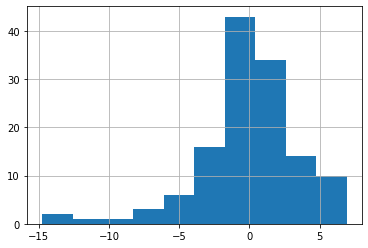

In [29]:
train.residuals.hist()

## Some trend, decent R2.
#### Vaguely normal but tailed distribution of residuals

### next steps:
- investigate what could correlate with engine displacement
- investigage usage of other features
- investigage combination of displacement with any other independent variables
- separate models for different class of vehicles